<a href="https://colab.research.google.com/github/mr-rojit/pytorch-basics/blob/main/pytorch_02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [66]:
linear = make_regression(50,1, noise=5)
X, y = linear
y = y.reshape(-1,1)

X = torch.from_numpy(X)
y = torch.from_numpy(y)

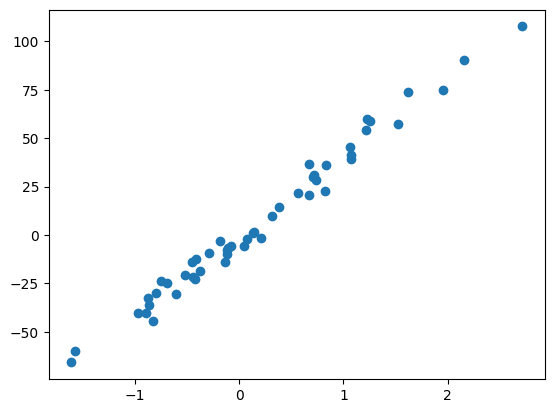

In [67]:
plt.scatter(X, y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [69]:
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float64))

  def forward(self, X: torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias


In [70]:
torch.manual_seed(42)

lr = LinearRegression()
list(lr.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [71]:
with torch.inference_mode():
  y_pred = lr(X_test)

In [72]:
y_pred

tensor([[-0.0117],
        [ 0.0916],
        [ 0.4898],
        [-0.1983],
        [-0.1491],
        [ 0.0892],
        [ 0.1022],
        [-0.1638],
        [ 0.0834],
        [-0.4132]], dtype=torch.float64)

In [73]:
y_test

tensor([[-12.4454],
        [ -6.5264],
        [ 39.4340],
        [-40.5050],
        [-44.2422],
        [ -7.4863],
        [ -5.9286],
        [-36.2277],
        [-14.1847],
        [-65.8239]], dtype=torch.float64)

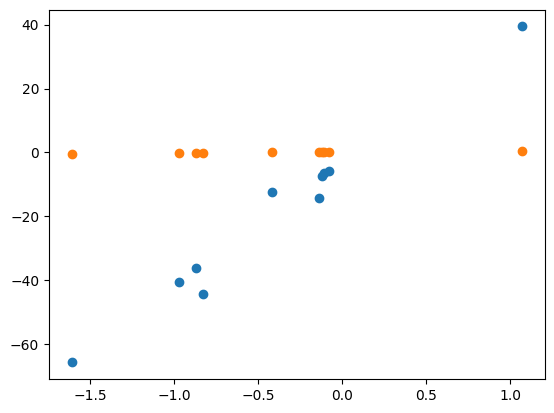

In [74]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)

In [75]:
mean_absolute_error(X_test, y_pred)

0.5148029744385582

Pytorch training loop

In [90]:
torch.manual_seed(42)
linear_regression_model = LinearRegression()

mae = nn.L1Loss()

sgd = torch.optim.SGD(params=linear_regression_model.parameters(), lr=0.1)

In [97]:
# training loop

epochs = 1000  # Increased number of epochs
for epoch in range(epochs):
    # Set model to training mode
    linear_regression_model.train()

    # Make prediction using forward pass
    y_pred = linear_regression_model(X_train)

    # Calculate loss
    loss = mae(y_pred, y_train)

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
        print(f'Weights: {linear_regression_model.weights.item()}, Bias: {linear_regression_model.bias.item()}')

    # Zero the gradients
    sgd.zero_grad()

    # Perform backward pass
    loss.backward()

    # Update the weights
    sgd.step()


Epoch [100/1000], Loss: 19.7374
Weights: 16.145585412631718, Bias: 0.8688094051365903
Epoch [200/1000], Loss: 13.9027
Weights: 23.778876470805983, Bias: 1.02880940513659
Epoch [300/1000], Loss: 8.7792
Weights: 30.90148142433269, Bias: 0.8038094051365885
Epoch [400/1000], Loss: 5.0633
Weights: 36.960430038507866, Bias: 0.8438094051365885
Epoch [500/1000], Loss: 4.4518
Weights: 38.8382808217048, Bias: 0.18380940513658794
Epoch [600/1000], Loss: 4.3824
Weights: 39.56444331156535, Bias: -0.12119059486341228
Epoch [700/1000], Loss: 4.3725
Weights: 39.73762957194229, Bias: -0.2661905948634124
Epoch [800/1000], Loss: 4.3689
Weights: 39.802157266194094, Bias: -0.45119059486341256
Epoch [900/1000], Loss: 4.3652
Weights: 39.866684960445895, Bias: -0.6361905948634127
Epoch [1000/1000], Loss: 4.3638
Weights: 39.89939524782842, Bias: -0.6911905948634127


In [98]:
with torch.inference_mode():
  new_y_pred = linear_regression_model(X_test)

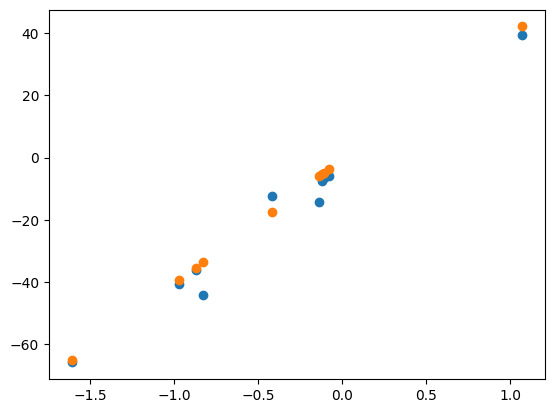

In [99]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, new_y_pred)